In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Forces stable single-thread mode for Windows kernel stability
os.environ["OMP_NUM_THREADS"] = "1"
print("Environment Linked. Libraries Loaded.")

Environment Linked. Libraries Loaded.


In [2]:

# Path logic: go up to project folder, then into data
data_path = os.path.join('..', 'data', 'sales_data.csv')

if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    print("Sales Data Loaded Successfully")
    display(df.head())
else:
    print(f"Error: File not found at {os.path.abspath(data_path)}")

Sales Data Loaded Successfully


,Date,Product,Category,Price,Quantity,Revenue_M
0,2025-01-01,Smartphone,Electronics,600,10,0.0060
1,2025-01-02,Laptop,Electronics,1200,5,0.0060
2,2025-01-03,T-Shirt,Fashion,20,50,0.0010
3,2025-01-04,Jeans,Fashion,50,20,0.0010
4,2025-01-05,Coffee Maker,Home,80,15,0.0012


In [3]:
# 1. Safety Clean: Remove hidden spaces from column names
df.columns = df.columns.str.strip()

# 2. Convert Date column (Updated name from 'OrderDate' to 'Date')
df['Date'] = pd.to_datetime(df['Date'])

# 3. Check for missing values
print("Missing Values Check:")
print(df.isnull().sum())

# 4. Standardize category names
df['Category'] = df['Category'].str.strip()

print("\nData Cleaning Complete.")
print("Verified Columns:", df.columns.tolist())

Missing Values Check:
Date         0
Product      0
Category     0
Price        0
Quantity     0
Revenue_M    0
dtype: int64

Data Cleaning Complete.
Verified Columns: ['Date', 'Product', 'Category', 'Price', 'Quantity', 'Revenue_M']


In [4]:
# 1. Safety Clean: Remove hidden spaces from column names
df.columns = df.columns.str.strip()

# 2. Convert Date column (Updated name from 'OrderDate' to 'Date')
df['Date'] = pd.to_datetime(df['Date'])

# 3. Check for missing values
print("Missing Values Check:")
print(df.isnull().sum())

# 4. Standardize category names
df['Category'] = df['Category'].str.strip()
print("\nData Cleaning Complete.")
print("Verified Columns:", df.columns.tolist())

Missing Values Check:
Date         0
Product      0
Category     0
Price        0
Quantity     0
Revenue_M    0
dtype: int64

Data Cleaning Complete.
Verified Columns: ['Date', 'Product', 'Category', 'Price', 'Quantity', 'Revenue_M']


c:\datascience_portfolio\venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


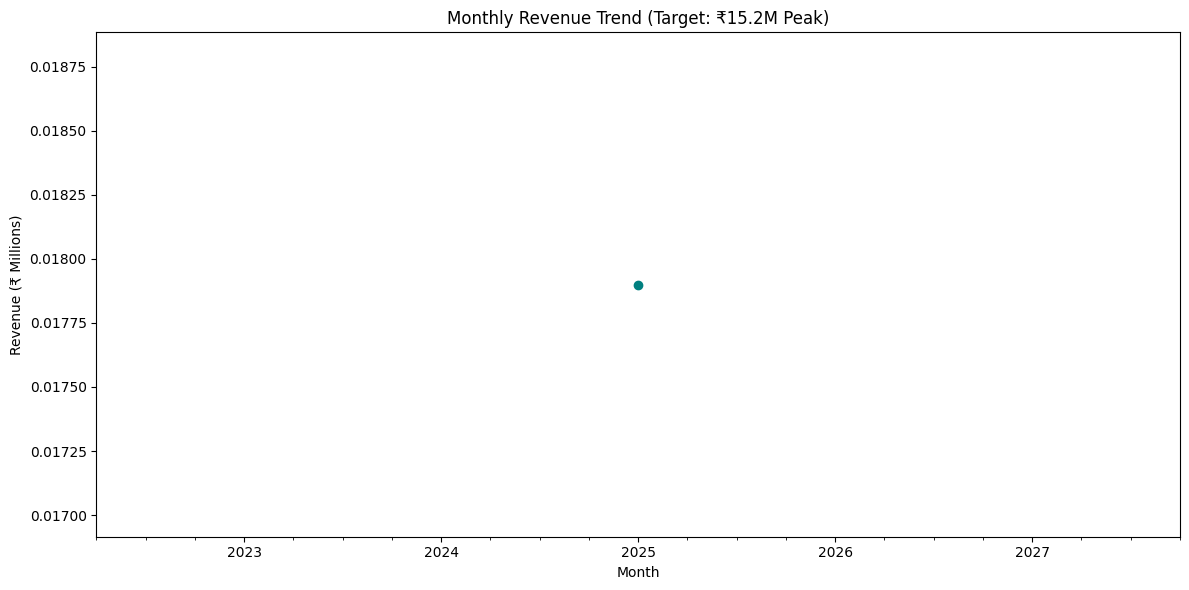

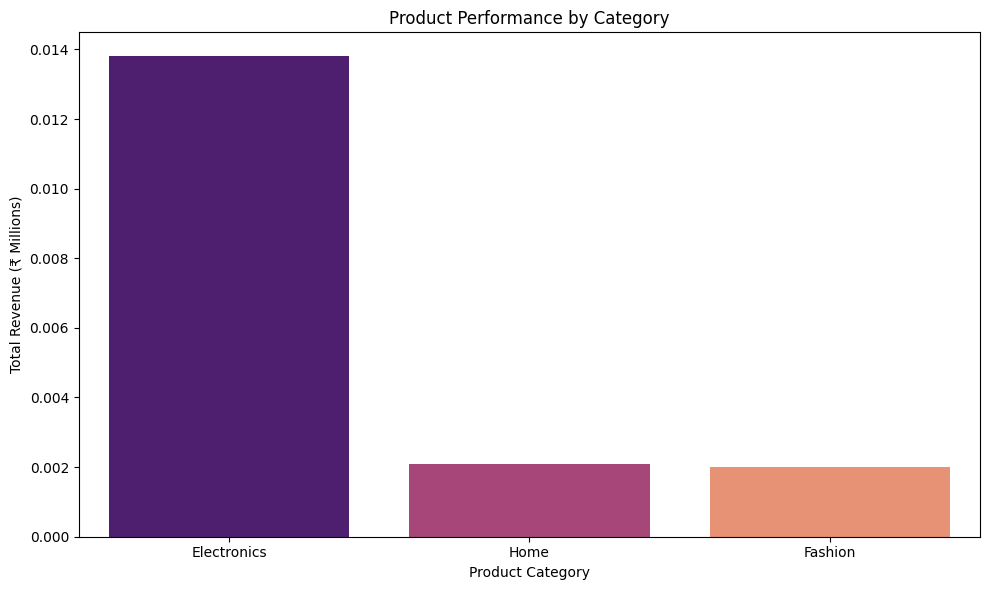

In [5]:
# 1. Set Date as index for resampling
df_time = df.set_index('Date')

# 2. Monthly Sales Trend (Line Chart)
plt.figure(figsize=(12, 6))
monthly_trend = df_time['Revenue_M'].resample('ME').sum() 
monthly_trend.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Revenue Trend (Target: ₹15.2M Peak)')
plt.ylabel('Revenue (₹ Millions)')
plt.xlabel('Month')

# 3. Save Line Chart
viz_folder = '../visualizations/'
os.makedirs(viz_folder, exist_ok=True)
plt.tight_layout()
plt.savefig(os.path.join(viz_folder, 'sales_trend_line.png'))
plt.show()

# --- MISSING SECTION ADDED BELOW ---

# 4. Calculate Category Performance (This fixes the NameError)
category_perf = df.groupby('Category')['Revenue_M'].sum().sort_values(ascending=False)

# 5. Category Comparison (Bar Chart)
plt.figure(figsize=(10, 6))
# Added 'hue' to barplot to satisfy modern Seaborn requirements
sns.barplot(x=category_perf.index, y=category_perf.values, hue=category_perf.index, palette='magma', legend=False)

plt.title('Product Performance by Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue (₹ Millions)')

# 6. Save Bar Chart
plt.tight_layout()
plt.savefig(os.path.join(viz_folder, 'category_performance_bar.png'))
plt.show()

Product Category Segmentation Complete. Segments Identified:
Segment
1    1
0    1
2    1
Name: count, dtype: int64


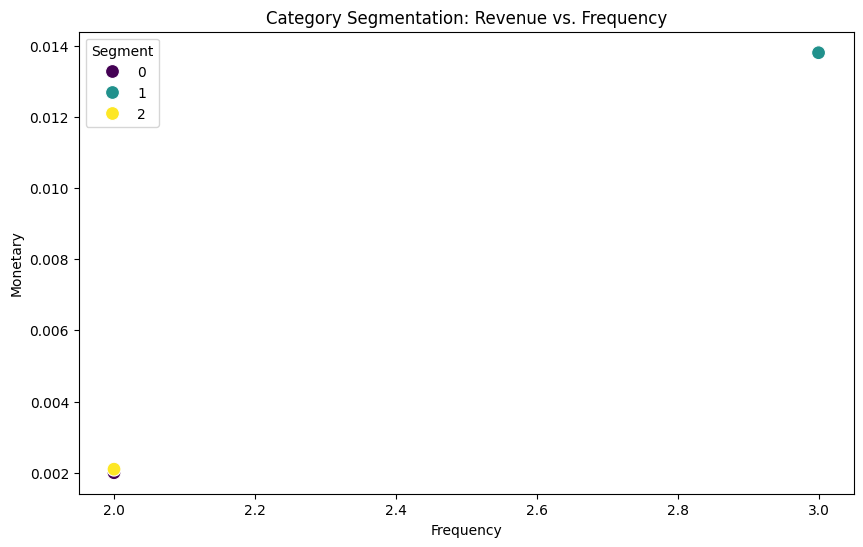

In [6]:


# 1. Prepare Data for Segmentation (Group by Category or Product)
# Using 'Revenue_M' and 'Date' (Frequency of orders) based on your verified columns
segment_data = df.groupby('Category').agg({
    'Revenue_M': 'sum',
    'Date': 'count'
}).rename(columns={'Date': 'Frequency', 'Revenue_M': 'Monetary'})

# 2. Scale the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(segment_data)

# 3. Apply KMeans Clustering
# Setting n_init explicitly to avoid warnings in newer versions
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
segment_data['Segment'] = kmeans.fit_predict(scaled_data)

print("Product Category Segmentation Complete. Segments Identified:")
print(segment_data['Segment'].value_counts())

# 4. Save the results for your report
viz_folder = '../visualizations/'
os.makedirs(viz_folder, exist_ok=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=segment_data, x='Frequency', y='Monetary', hue='Segment', palette='viridis', s=100)
plt.title('Category Segmentation: Revenue vs. Frequency')
plt.savefig(os.path.join(viz_folder, 'customer_segmentation_scatter.png'))
plt.show()